<a href="https://colab.research.google.com/github/YuvrajTak/CIPHERML_Assignments/blob/master/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Source:**

Tiago A. Almeida (talmeida ufscar.br)
Department of Computer Science
Federal University of Sao Carlos (UFSCar)
Sorocaba, Sao Paulo - Brazil

JosÃ© MarÃ­a GÃ³mez Hidalgo (jmgomezh yahoo.es)
R&D Department Optenet
Las Rozas, Madrid - Spain

**Data Set Information:**

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

[1] GÃ³mez Hidalgo, J.M., Cajigas Bringas, G., Puertas Sanz, E., Carrero GarcÃ­a, F. Content Based SMS Spam Filtering. Proceedings of the 2006 ACM Symposium on Document Engineering (ACM DOCENG'06), Amsterdam, The Netherlands, 10-13, 2006.

[2] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Feature engineering for mobile (SMS) spam filtering. Proceedings of the 30th Annual international ACM Conference on Research and Development in information Retrieval (ACM SIGIR'07), New York, NY, 871-872, 2007.

[3] Cormack, G. V., GÃ³mez Hidalgo, J. M., and Puertas SÃ¡nz, E. Spam filtering for short messages. Proceedings of the 16th ACM Conference on Information and Knowledge Management (ACM CIKM'07). Lisbon, Portugal, 313-320, 2007.

**Attribute Information:**

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you?
ham Ok lar... Joking wif u oni...
ham dun say so early hor... U c already then say...
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
ham Siva is in hostel aha:-.
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU

Note: the messages are not chronologically sorted.



# Importing  Libery


In [122]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [123]:
# Setup
!pip install -q wordcloud
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [124]:
import re
import string as st

In [129]:
#load data set in the natebook
df = pd.read_csv("/content/SMSSpamCollection",sep="\t",names=["target","messenge"],error_bad_lines=False)
df["length_of_string"] = [len(i) for i in df["messenge"]]
df

,target,messenge,length_of_string
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [130]:
df.shape

(5572, 3)

In [131]:
df["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

**Observation**

It Shows no of ham and spam mails

In [132]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
target,5572,2,ham,4825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
messenge,5572,5169,"Sorry, I'll call later",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
length_of_string,5572,NaN,NaN,NaN,80.4899,59.9429,2,36,62,122,910


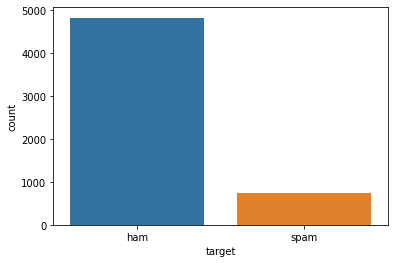

In [133]:
sea.countplot(df["target"])
plt.show()



**Observation**

    This graph show a comparision b/w Ham and spam mails

In [134]:
df.groupby('target').describe()

length_of_string                         ...                     
                  count        mean        std  ...    50%    75%    max
target                                          ...                     
ham              4825.0   71.482487  58.440652  ...   52.0   93.0  910.0
spam              747.0  138.670683  28.873603  ...  149.0  157.0  223.0

[2 rows x 8 columns]

**Observation**

It shows descriptive analysis of data set

In [135]:
!pip install wordcloud

In [136]:
# Importing wordcloud
from wordcloud import WordCloud, STOPWORDS

In [137]:
data = df.loc[data['target']=='spam', :]
data

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,target,messenge,length_of_string


**Observation**

It shows dataset contain only sham mails

# Remove Space from string

In [138]:
words = ' '.join(data['messenge'])
words

''

In [139]:
from wordcloud import WordCloud, STOPWORDS

In [140]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])
cleaned_word

''

**Observation**

Now trash data is removed

In [141]:
def cloud(d,l):
#l for label
#d for dataframe
    words = ''
    for msg in d[d['target']==l]['messenge']:
        msg = msg.lower()
        words += msg + ''
    wordcloud = WordCloud(width = 800, height = 500).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

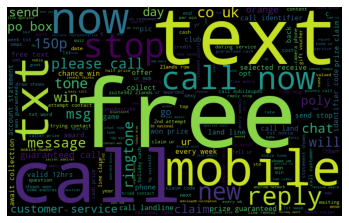

In [143]:
cloud(df,'spam')


# Preprocessing of data

In [145]:
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
def text_process(mess, flag):
# mess for reference raw string
#flag reference "stm" for stmming and "lm" for lemmatization.

    from nltk.corpus import wordnet
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    clean_msg_lst = []
    npunc = [p for p in mess if p not in st.punctuation]
    npunc = "".join(npunc)
    clean_mess = [word.lower() for word in npunc.split() if word.lower() not in stopwords.words("english")]
    token = [word_tokenize(word) for word in npunc.split()]
    token = [''.join(ele) for ele in token]
    if (flag == 'stem'):
        clean_mess = [stemmer.stem(word) for word in token]
    else:
        clean_mess = [lemmatizer.lemmatize(word) for word in token]

    clean_msg_lst.append(" ".join(clean_mess))
    return (clean_msg_lst[0])

**Observation**

This function return  
        
        . remove stop word.(convert lowercase).
        
        . word_tokenize.

        . stammering or Lemmatize.
      

In [147]:
print(text_process(df["messenge"][0],flag="stem"))

Go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat


In [148]:
%%time
df["stemmed_messenge"] = df['messenge'].apply(lambda x: text_process(x, 'stem'))

CPU times: user 15.7 s, sys: 1.17 s, total: 16.9 s
Wall time: 16.9 s


In [149]:
df

,target,messenge,length_of_string,stemmed_messenge
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazi avail onli in bugi...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win FA cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so earli hor U c alreadi then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah I dont think he goe to usf he live around ...
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,thi is the 2nd time we have tri 2 contact u U ...
5568,ham,Will ü b going to esplanade fr home?,36,will ü b go to esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti wa in mood for that soani other suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitch but I act like id be in...


**Observation**


 new column of stammed messages is added.

In [150]:


%%time
df["clean_messenge_lmt"] = df['messenge'].apply(lambda x: text_process(x,"lm"))



CPU times: user 14.6 s, sys: 1.02 s, total: 15.6 s
Wall time: 15.6 s


In [151]:
df

,target,messenge,length_of_string,stemmed_messenge,clean_messenge_lmt
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazi avail onli in bugi...,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so earli hor U c alreadi then say,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah I dont think he goe to usf he live around ...,Nah I dont think he go to usf he life around h...
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,thi is the 2nd time we have tri 2 contact u U ...,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,36,will ü b go to esplanad fr home,Will ü b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti wa in mood for that soani other suggest,Pity wa in mood for that Soany other suggestion
5570,ham,The guy did some bitching but I acted like i'd...,125,the guy did some bitch but I act like id be in...,The guy did some bitching but I acted like id ...


**Observation**
new column clean message is added

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer="word")
X = cv.fit_transform(df["stemmed_messenge"])

In [155]:
print(cv.get_feature_names())

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '08701213186', '0870

**Observation**

It Shows Vectorize List of data

In [156]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Observation**

 It Shows Array form of Data

In [157]:
print(X)

  (0, 3338)	1
  (0, 7500)	1
  (0, 4132)	1
  (0, 5636)	1
  (0, 2249)	1
  (0, 1345)	1
  (0, 5294)	1
  (0, 3876)	1
  (0, 1754)	1
  (0, 3429)	1
  (0, 7931)	1
  (0, 4277)	1
  (0, 1752)	1
  (0, 2031)	1
  (0, 7133)	1
  (0, 3391)	1
  (0, 1151)	1
  (0, 7720)	1
  (1, 5259)	1
  (1, 4312)	1
  (1, 4098)	1
  (1, 7841)	1
  (1, 5291)	1
  (2, 3876)	1
  (2, 3150)	1
  :	:
  (5570, 7759)	1
  (5570, 1165)	1
  (5570, 3827)	1
  (5570, 4401)	1
  (5570, 6592)	1
  (5570, 3108)	1
  (5570, 7112)	1
  (5570, 1468)	1
  (5570, 5051)	1
  (5570, 2493)	1
  (5570, 7537)	1
  (5570, 1777)	1
  (5570, 6601)	1
  (5570, 1781)	1
  (5570, 2763)	1
  (5570, 3257)	1
  (5570, 3481)	1
  (5570, 3944)	1
  (5570, 988)	1
  (5570, 1567)	1
  (5571, 7239)	1
  (5571, 3992)	2
  (5571, 4973)	1
  (5571, 7369)	1
  (5571, 6116)	1


In [158]:
X.shape

(5572, 8176)

**Observation**

 This data set contain 5572 Rows and 8176 Columns

In [161]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df["target"] = l.fit_transform(df["target"])

In [162]:
df

,target,messenge,length_of_string,stemmed_messenge,clean_messenge_lmt
0,0,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazi avail onli in bugi...,Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri in 2 a wkli comp to win FA cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,49,U dun say so earli hor U c alreadi then say,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah I dont think he goe to usf he live around ...,Nah I dont think he go to usf he life around h...
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,thi is the 2nd time we have tri 2 contact u U ...,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?,36,will ü b go to esplanad fr home,Will ü b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,piti wa in mood for that soani other suggest,Pity wa in mood for that Soany other suggestion
5570,0,The guy did some bitching but I acted like i'd...,125,the guy did some bitch but I act like id be in...,The guy did some bitching but I acted like id ...


**Observation**

 Now  categorical data is converted into numeric

# Split Data Into Train and Test

In [163]:
from sklearn.model_selection import train_test_split
m_train,m_test,l_train,l_test = train_test_split(X.toarray(),df.target,test_size = 0.25,random_state=10)

# Building diff type of Models
1.Logistic Regression

2.Decision Trees

3.SVM


In [164]:
from sklearn.linear_model import LogisticRegression
#importing Logistiv Regression model from sklearn libery.

from sklearn.tree import DecisionTreeClassifier
#importing Decision Tree model from sklearn libery.

from sklearn.svm import SVC
#importing supprot vector machine model from sklearn libery.

In [165]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Inport function fron sklearn

In [166]:
#### dict of Algo's
log = LogisticRegression()
dt = DecisionTreeClassifier()
sv = SVC(probability = True)

classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC']
models = {logi: 'LogisticRegression', 
          dt: 'DecisionTreeClassifier', 
          sv: 'SVC'}

**Observation**

  We are using Dictonary to store all diff. Algorithms

In [168]:
#### Function to print acceuracy measures of different algo's
def performance(algo, name, X_test, y_test, y_test_pred):
    # Accuracy Score
    score = accuracy_score(y_test, y_test_pred)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sea.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(classification_report(y_test, y_test_pred))

**Observation**


*   This function is use print Accuracy,Confusion matrix,Classification



######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.9755922469490309


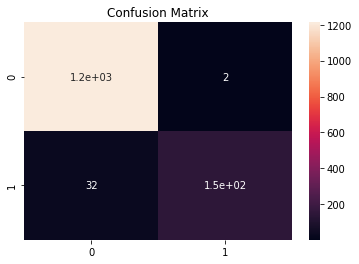

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1215
           1       0.99      0.82      0.90       178

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.9526202440775305


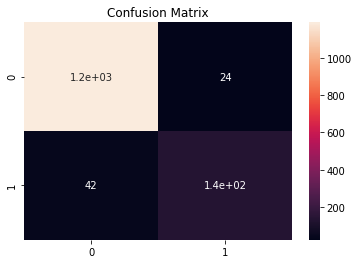

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1215
           1       0.85      0.76      0.80       178

    accuracy                           0.95      1393
   macro avg       0.91      0.87      0.89      1393
weighted avg       0.95      0.95      0.95      1393

######################################## SVC ########################################
Accuracy score for SVC : 0.9698492462311558


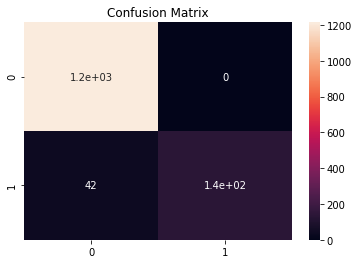

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1215
           1       1.00      0.76      0.87       178

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393

CPU times: user 7min 35s, sys: 649 ms, total: 7min 35s
Wall time: 7min 34s


In [169]:
%%time
acc = {"algo":[],"accuracy_score":[]}
for algo, name in models.items():
    print('#'*40, name, '#'*40)
    fit = algo.fit(m_train,l_train)
    pred = fit.predict(m_test)
    performance(algo, name, m_test, l_test, pred)
    acc["algo"].append(name)
    acc["accuracy_score"].append(accuracy_score(l_test,pred))

 **Observation**

It shows Accuracy ,recall,f1- score and other details of 

Logistic Regression

Decision Trees

SVM

# Evaluation

In [170]:
acc = pd.DataFrame(acc)
acc

,algo,accuracy_score
0,LogisticRegression,0.975592
1,DecisionTreeClassifier,0.952620
2,SVC,0.969849


**Observation**

  It Shows that Logistic Regression perform better than other.